# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1) #10k test set also 10%

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

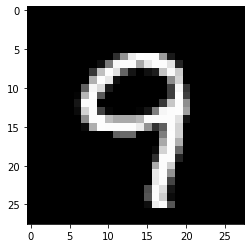

In [5]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(train_x[0,:],(28,28)), cmap='gray')
plt.imshow(np.reshape(train_x[1,:],(28,28)), cmap='gray')


### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [6]:
#define models
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [7]:
naivebayes=GaussianNB()
naivebayes.fit(train_x,train_y)

naivebayes_predicted = naivebayes.predict(train_x)

accuracy_score(train_y,naivebayes_predicted)

0.5627142857142857

In [8]:
confusion_matrix(train_y,naivebayes_predicted)

array([[5636,   10,   37,   16,    9,   14,  194,    6,  198,  101],
       [   4, 6678,   19,   27,    3,   10,   85,    3,  174,   73],
       [ 587,  164, 1927,  374,   25,   22, 1616,   19, 1424,   96],
       [ 409,  318,   61, 2180,   12,   13,  372,   54, 2349,  658],
       [ 176,   41,   52,   31,  987,   31,  650,   32, 1216, 2923],
       [ 703,  148,   35,  122,   31,  272,  339,   13, 3444,  588],
       [  58,   99,   30,    2,    4,   19, 5851,    0,  119,   10],
       [  28,   47,    7,   49,   50,    6,   19, 2081,  212, 4088],
       [ 105,  760,   27,   53,   19,   33,  110,    8, 3905, 1105],
       [  38,   39,   18,   12,   33,    3,    6,   90,  112, 5934]],
      dtype=int64)

In [9]:
linear=linear_model.SGDClassifier(loss='log')
linear.fit(train_x,train_y)
linear_predicted = linear.predict(train_x)
accuracy_score(train_y,linear_predicted)

0.8974126984126984

In [10]:
confusion_matrix(train_y,linear_predicted)

array([[5981,    0,   45,   21,   10,   10,   31,    1,  107,   15],
       [   1, 6729,   70,   39,    8,   27,    2,    7,  167,   26],
       [  12,   26, 5709,  123,   67,   25,   40,   35,  188,   29],
       [   8,    8,  175, 5969,   12,   51,   11,   16,  124,   52],
       [   4,   12,   27,   37, 5330,    7,   30,    8,  226,  458],
       [  50,    3,   53,  697,   76, 4257,   85,    5,  391,   78],
       [  21,   13,   64,   12,   31,   99, 5847,    0,   99,    6],
       [  28,   12,   97,  123,   68,   29,    3, 5736,  138,  353],
       [  16,   44,   74,  340,   23,  103,   27,   14, 5437,   47],
       [  19,   14,   36,  182,   89,   43,    2,   56,  302, 5542]],
      dtype=int64)

In [11]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(train_x)
accuracy_score(train_y,rf_predicted)

0.9992539682539683

In [12]:
confusion_matrix(train_y,rf_predicted)

array([[6221,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 7075,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    1, 6249,    0,    0,    0,    0,    2,    2,    0],
       [   0,    0,    1, 6422,    0,    1,    0,    2,    0,    0],
       [   2,    1,    2,    0, 6132,    0,    0,    2,    0,    0],
       [   1,    0,    1,    4,    0, 5686,    3,    0,    0,    0],
       [   2,    1,    1,    0,    0,    2, 6186,    0,    0,    0],
       [   0,    0,    1,    1,    1,    0,    0, 6582,    0,    2],
       [   0,    0,    2,    0,    0,    0,    1,    0, 6122,    0],
       [   2,    0,    1,    2,    1,    0,    0,    1,    0, 6278]],
      dtype=int64)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [66]:
from sklearn.metrics import f1_score
from sklearn import metrics

In [55]:
naivebayes_acc=accuracy_score(test_y,naivebayes.predict(test_x))
naivebayes_f1=f1_score(test_y,naivebayes.predict(test_x),average='micro')

linear_acc=accuracy_score(test_y,linear.predict(test_x))
linear_f1=f1_score(test_y,linear.predict(test_x),average='micro')

rf_acc=accuracy_score(test_y,rf.predict(test_x))
rf_f1=f1_score(test_y,rf.predict(test_x),average='micro')

In [56]:
naivebayes_acc

0.5685714285714286

In [57]:
naivebayes_f1

0.5685714285714286

In [58]:
linear_acc

0.8817142857142857

In [59]:
linear_f1

0.8817142857142857

In [60]:
rf_acc

0.9482857142857143

In [61]:
rf_f1

0.9482857142857143

In [67]:
y_five = test_y=='5' #get bool lables=='5' - NOTE original lables are strings!
bayes_five = naivebayes.predict(test_x).astype(int)==5 #get bool for predictions - cast to int because predictions are uint
linear_five = linear.predict(test_x).astype(int)==5
rf_five = rf.predict(test_x).astype(int)==5

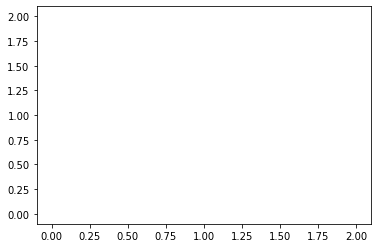

In [69]:

plt.plot(metrics.roc_curve(y_five, bayes_five, pos_label=2))

